In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
#%matplotlib inline
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud
    
# Storing the sets of punctuation in variable result 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/review_data.csv')

In [3]:
df = df[['title', 'asin', 'overall', 'brand', 'reviewText', 'summary']]

In [4]:
#df.describe(include='all')
df.dtypes

title          object
asin           object
overall       float64
brand          object
reviewText     object
summary        object
dtype: object

In [5]:
df.apply(pd.to_numeric, errors="ignore").applymap(lambda x: isinstance(x, float), na_action='ignore').any()

title         False
asin          False
overall        True
brand         False
reviewText    False
summary       False
dtype: bool

In [6]:
fig = px.histogram(df, x='overall', title="Game Review Ratings")
fig.show()

In [7]:
first_dialogue = df.loc[10, "reviewText"]

res = re.sub(r'[^\w\s]', '', first_dialogue)
print(res)

4 Stars because they like it and play it often enough so dont feel like money is wasted I got them one each so they can multiplay with each other


In [8]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
wordList = wordpunct_tokenize(res) 

wList = []

for r in wordList:
    if not r in stop_words:
      wList.append(r)
wList

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['4',
 'Stars',
 'like',
 'play',
 'often',
 'enough',
 'dont',
 'feel',
 'like',
 'money',
 'wasted',
 'I',
 'got',
 'one',
 'multiplay']

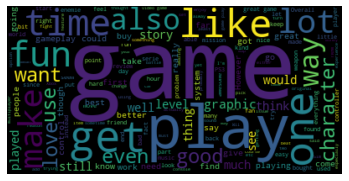

In [9]:
# Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href"])
textt = " ".join(str(review) for review in df.reviewText)
#textt = " ".join(wList)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [10]:
df['sentiment'] = df['overall'].apply(lambda rating : +1 if rating > 3 else (0 if rating == 3 else -1))

In [11]:
df

,title,asin,overall,brand,reviewText,summary,sentiment
0,Anno 2070,0700026657,5.0,Ubisoft,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1
1,Anno 2070,0700026657,4.0,Ubisoft,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1
2,Anno 2070,0700026657,3.0,Ubisoft,ok game.,Three Stars,0
3,Anno 2070,0700026657,2.0,Ubisoft,"found the game a bit too complicated, not what...",Two Stars,-1
4,Anno 2070,0700026657,5.0,Ubisoft,"great game, I love it and have played it since...",love this game,1
...,...,...,...,...,...,...,...
273651,Resident Evil 7 Biohazard [Online Game Code],B01H3Z4MYE,4.0,Capcom,"Bought the game directly from Steam, finished ...",Good enough if you get it at discount price,1
273652,Resident Evil 7 Biohazard [Online Game Code],B01H3Z4MYE,4.0,Capcom,Firstly I love this game it was very very scar...,Solid game but.....,1
273653,Resident Evil 7 Biohazard [Online Game Code],B01H3Z4MYE,2.0,Capcom,I think the original MYST was more exciting th...,Total waste of time and money.,-1
273654,The Sims 4 Kids Room Stuff [Online Game Code],B01HH6JEOC,3.0,ElectronicArts,Okay stuff.,Three Stars,0


In [13]:
fig = px.histogram(df, x = 'sentiment', title= 'Aggregated Sentiment Counts')
fig.show()

In [ ]:
#Stopwords to add to list: Game, get, play, one

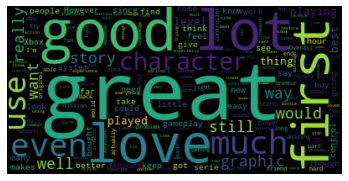

In [24]:
#Positive Sentiment WordCloud
df_pos = df[df['sentiment'] == 1]

# Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href", "game", "get", "play", "one", "time", "like", "fun","games", "also", "make"])
textt = " ".join(str(review) for review in df_pos.reviewText)
#textt = " ".join(wList)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

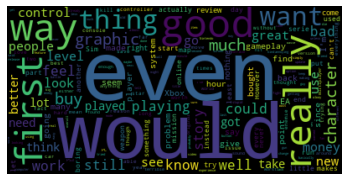

In [25]:
#Negative Sentiment WordCloud
df_neg = df[df['sentiment'] == -1]

# Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href", "game", "get", "play", "one", "time", "like", "fun","games", "also", "make"])
textt = " ".join(str(review) for review in df_neg.reviewText)
#textt = " ".join(wList)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

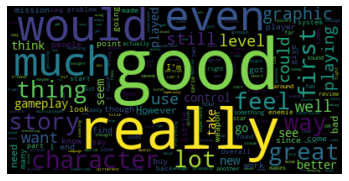

In [26]:
#Neutral Sentiment WordCloud
df_n = df[df['sentiment'] == 0]

# Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href", "game", "get", "play", "one", "time", "like", "fun","games", "also", "make"])
textt = " ".join(str(review) for review in df_n.reviewText)
#textt = " ".join(wList)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [27]:
#Stopwords to add to list: Game, get, play, one

In [ ]:
# Remove Updated Stop Words and Punctuation from Column
# Create updated DataFrame
# Vectorize Words
# Test Train Split
# Create Naive Method to establish Baseline
# Create 3 Tree/Emsemble Classifiers
# Establish Error Metrics 